<a href="https://colab.research.google.com/github/aayush1324/Scaler_DSML2022/blob/main/Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1128]:
from scipy.stats import binom , norm , poisson , expon ,geom

In [1129]:
from scipy.stats import ttest_ind , ttest_rel , f_oneway , kruskal
from scipy.stats import norm , chi2 , f
from scipy.stats import chi2_contingency , chisquare
from scipy.stats import pearsonr , spearmanr
from scipy.stats import kstest

In [1130]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [1131]:
! wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181" -O Delhivery.csv

--2022-11-27 18:14:16--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.67.66.76, 18.67.66.49, 18.67.66.31, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.67.66.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘Delhivery.csv’

Delhivery.csv       100%[===================>]  53.04M   212MB/s    in 0.2s    

2022-11-27 18:14:16 (212 MB/s) - ‘Delhivery.csv’ saved [55617130/55617130]



In [1132]:
df = pd.read_csv("Delhivery.csv")

In [1133]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [1134]:
datas = df.copy()

# **EDA**

In [1135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [1136]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [1137]:
df.describe(include = object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [1138]:
len(df)

144867

In [1139]:
df.shape

(144867, 24)

In [1140]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [1141]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [1142]:
percent_missing = (((df.isnull().sum())/len(df))*100).round(2)
percent_missing

data                              0.00
trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
is_cutoff                         0.00
cutoff_factor                     0.00
cutoff_timestamp                  0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
factor                            0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
segment_factor                    0.00
dtype: float64

In [1143]:
df[df.isnull().any(axis=1)]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
110,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,...,2018-09-26 05:57:25,24.538214,58.0,33.0,30.8845,1.757576,58.0,33.0,30.8845,1.757576
111,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,...,2018-09-26 05:04:49.254901,34.657709,110.0,43.0,41.5361,2.558140,52.0,10.0,10.6517,5.200000
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144484,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:54:08,45.134384,62.0,45.0,47.7734,1.377778,34.0,23.0,23.6601,1.478261
144485,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:30:09,66.542266,86.0,71.0,71.9549,1.211268,23.0,25.0,24.1815,0.920000
144486,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:00:08,88.143957,116.0,114.0,112.6943,1.017544,30.0,43.0,40.7394,0.697674
144487,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 19:02:11,111.084417,173.0,123.0,134.1940,1.406504,57.0,45.0,46.9217,1.266667


In [1144]:
df.dropna(how = "any", axis = 0, inplace = True)
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [1145]:
df.shape

(144316, 24)

# **Drop columns**

In [1146]:
df = df.drop(["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "segment_factor"] , axis = 1)

In [1147]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [1148]:
df.shape

(144316, 19)

# ***GroupBy***

In [1149]:
grouped_1 = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg(
    data                           =  pd.NamedAgg(column="data", aggfunc="first"),
    route_schedule_uuid            =  pd.NamedAgg(column="route_schedule_uuid", aggfunc="first"),
    trip_creation_time             =  pd.NamedAgg(column="trip_creation_time", aggfunc="first"),
    route_type                     =  pd.NamedAgg(column="route_type", aggfunc="first"),
    source_center                  =  pd.NamedAgg(column="source_center", aggfunc="first"),
    source_name                    =  pd.NamedAgg(column="source_name", aggfunc="first"),
    destination_center             =  pd.NamedAgg(column="destination_center", aggfunc="first"),
    destination_name               =  pd.NamedAgg(column="destination_name", aggfunc="first"),
    od_start_time                  =  pd.NamedAgg(column="od_start_time", aggfunc="first"),
    od_end_time                    =  pd.NamedAgg(column="od_end_time", aggfunc="first"),
    start_to_end_scan              =  pd.NamedAgg(column="start_scan_to_end_scan", aggfunc="first"),
    actual_distance                =  pd.NamedAgg(column="actual_distance_to_destination", aggfunc="last"),
    actual_time                    =  pd.NamedAgg(column="actual_time", aggfunc="last"),
    osrm_time                      =  pd.NamedAgg(column="osrm_time", aggfunc="last"),
    osrm_distance                  =  pd.NamedAgg(column="osrm_distance", aggfunc="last"),
    segment_actual_time            =  pd.NamedAgg(column="segment_actual_time", aggfunc="sum"),
    segment_osrm_time              =  pd.NamedAgg(column="segment_osrm_time", aggfunc="sum"),
    segment_osrm_distance          =  pd.NamedAgg(column="segment_osrm_distance", aggfunc="sum")).sort_values(['trip_uuid', "od_start_time"] )

In [1150]:
grouped_1.head()

data  \
trip_uuid               source_center destination_center             
trip-153671041653548748 IND462022AAA  IND209304AAA        training   
                        IND209304AAA  IND000000ACB        training   
trip-153671042288605164 IND572101AAA  IND561203AAB        training   
                        IND561203AAB  IND562101AAA        training   
trip-153671043369099517 IND562132AAA  IND000000ACB        training   

                                                                                        route_schedule_uuid  \
trip_uuid               source_center destination_center                                                      
trip-153671041653548748 IND462022AAA  IND209304AAA        thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...   
                        IND209304AAA  IND000000ACB        thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...   
trip-153671042288605164 IND572101AAA  IND561203AAB        thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...   
                        IND561203AAB  IND562101AAA        thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...   
trip-153671043369099517 IND562132AAA  IND000000ACB        thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...   

                                                                  trip_creation_time  \
trip_uuid               source_center destination_center                               
trip-153671041653548748 IND462022AAA  IND209304AAA        2018-09-12 00:00:16.535741   
                        IND209304AAA  IND000000ACB        2018-09-12 00:00:16.535741   
trip-153671042288605164 IND572101AAA  IND561203AAB        2018-09-12 00:00:22.886430   
                        IND561203AAB  IND562101AAA        2018-09-12 00:00:22.886430   
trip-153671043369099517 IND562132AAA  IND000000ACB        2018-09-12 00:00:33.691250   

                                                         route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND462022AAA  IND209304AAA              FTL   
                        IND209304AAA  IND000000ACB              FTL   
trip-153671042288605164 IND572101AAA  IND561203AAB          Carting   
                        IND561203AAB  IND562101AAA          Carting   
trip-153671043369099517 IND562132AAA  IND000000ACB              FTL   

                                                         source_center  \
trip_uuid               source_center destination_center                 
trip-153671041653548748 IND462022AAA  IND209304AAA        IND462022AAA   
                        IND209304AAA  IND000000ACB        IND209304AAA   
trip-153671042288605164 IND572101AAA  IND561203AAB        IND572101AAA   
                        IND561203AAB  IND562101AAA        IND561203AAB   
trip-153671043369099517 IND562132AAA  IND000000ACB        IND562132AAA   

                                                                                 source_name  \
trip_uuid               source_center destination_center                                       
trip-153671041653548748 IND462022AAA  IND209304AAA        Bhopal_Trnsport_H (Madhya Pradesh)   
                        IND209304AAA  IND000000ACB        Kanpur_Central_H_6 (Uttar Pradesh)   
trip-153671042288605164 IND572101AAA  IND561203AAB             Tumkur_Veersagr_I (Karnataka)   
                        IND561203AAB  IND562101AAA         Doddablpur_ChikaDPP_D (Karnataka)   
trip-153671043369099517 IND562132AAA  IND000000ACB          Bangalore_Nelmngla_H (Karnataka)   

                                                         destination_center  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND462022AAA  IND209304AAA             IND209304AAA   
                        IND209304AAA  IND000000ACB             IND000000ACB   
trip-153671042288605164 IND572101AAA  IND561203AAB             IND561203AAB   
                        IND561203AAB  IND562101AAA             IND562101AAA   
trip-1536710

In [1151]:
grouped_1.shape

(26222, 18)

In [1152]:
grouped_2 = grouped_1.groupby(['trip_uuid']).agg(
    data                    = pd.NamedAgg(column="data", aggfunc="first"),
    route_schedule_uuid     = pd.NamedAgg(column="route_schedule_uuid", aggfunc="first"),
    trip_creation_time      = pd.NamedAgg(column="trip_creation_time", aggfunc="first"),
    route_type              = pd.NamedAgg(column="route_type", aggfunc="first"),
    source_centre           = pd.NamedAgg(column="source_center", aggfunc="first"),
    source_name             = pd.NamedAgg(column="source_name", aggfunc="first"),
    destination_centre      = pd.NamedAgg(column="destination_center", aggfunc="last"),
    destination_name        = pd.NamedAgg(column="destination_name", aggfunc="last"),
    od_start_time           = pd.NamedAgg(column="od_start_time", aggfunc="first"),
    od_end_time             = pd.NamedAgg(column="od_end_time", aggfunc="last"),
    start_to_end_scan       = pd.NamedAgg(column="start_to_end_scan", aggfunc="sum"),
    actual_distance         = pd.NamedAgg(column="actual_distance", aggfunc="sum"),
    actual_time             = pd.NamedAgg(column="actual_time", aggfunc="sum"),
    osrm_time               = pd.NamedAgg(column="osrm_time", aggfunc="sum"),
    osrm_distance           = pd.NamedAgg(column="osrm_distance", aggfunc="sum"),
    segment_actual_time     = pd.NamedAgg(column="segment_actual_time", aggfunc="sum"),
    segment_osrm_time       = pd.NamedAgg(column="segment_osrm_time", aggfunc="sum"),
    segment_osrm_distance   = pd.NamedAgg(column="segment_osrm_distance", aggfunc="sum"))

In [1153]:
grouped_2.head()

,data,route_schedule_uuid,trip_creation_time,route_type,source_centre,source_name,destination_centre,destination_name,od_start_time,od_end_time,start_to_end_scan,actual_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
trip_uuid,,,,,,,,,,,,,,,,,,
trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,2018-09-12 00:01:00.113710,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,2018-09-12 00:02:09.740725,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [1154]:
grouped_2.shape

(14787, 18)

In [1155]:
df = grouped_2

# **Unique Values**

In [1156]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)

for cat in cat_col:
  print(cat)
  print(df[cat].nunique())
  print("")
  

data
2

route_schedule_uuid
1497

trip_creation_time
14787

route_type
2

source_centre
865

source_name
865

destination_centre
951

destination_name
951

od_start_time
14787

od_end_time
14787



In [1157]:
len(cat_col)

10

In [1158]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)

for num in num_col:
  print(num)
  print(df[num].nunique())
  print("")
  

start_to_end_scan
2203

actual_distance
14771

actual_time
1850

osrm_time
814

osrm_distance
14704

segment_actual_time
1885

segment_osrm_time
1240

segment_osrm_distance
14724



In [1159]:
len(num_col)

8

# **Value Counts**

In [1160]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

['data',
 'route_schedule_uuid',
 'trip_creation_time',
 'route_type',
 'source_centre',
 'source_name',
 'destination_centre',
 'destination_name',
 'od_start_time',
 'od_end_time']

In [1161]:
len(cat_col)

10

In [1162]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['start_to_end_scan',
 'actual_distance',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [1163]:
len(num_col)

8

In [1164]:
for cat in (cat_col):
  print(df[cat].value_counts())
  print("")
  print("")

training    10645
test         4142
Name: data, dtype: int64


thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6    53
thanos::sroute:8e6cd941-adb5-4f66-b44f-84938f5fca03    46
thanos::sroute:c736b86f-5c1d-4497-832c-876db4c1a518    43
thanos::sroute:ca336899-47aa-4622-9885-b9fbb2302aeb    41
thanos::sroute:5f8fb6cf-814a-426f-b2c9-8665b605d343    40
                                                       ..
thanos::sroute:3aa2ec83-2ca6-4552-991f-c228f5185a2f     1
thanos::sroute:7707bf91-2c3d-42d2-b997-bce3efdd5e4b     1
thanos::sroute:6c3ea140-a3cf-4b78-8838-580c45aa7d76     1
thanos::sroute:22bb1825-736c-4578-964f-1f1e324b4c4b     1
thanos::sroute:2af16556-e1ff-47fc-96a6-69f90eeb590c     1
Name: route_schedule_uuid, Length: 1497, dtype: int64


2018-09-12 00:00:16.535741    1
2018-09-25 21:41:06.146606    1
2018-09-25 21:44:48.468275    1
2018-09-25 21:46:35.119793    1
2018-09-25 21:47:18.664051    1
                             ..
2018-09-18 20:42:22.202411    1
2018-09-18 20:43:53

In [1165]:
df["data"].value_counts()

training    10645
test         4142
Name: data, dtype: int64

In [1166]:
df["route_type"].value_counts()

Carting    8906
FTL        5881
Name: route_type, dtype: int64

In [1167]:
for num in (num_col):
  print(df[num].value_counts())
  print("")
  print("")

148.0     51
115.0     51
87.0      50
113.0     49
128.0     49
          ..
691.0      1
3325.0     1
3853.0     1
1837.0     1
2180.0     1
Name: start_to_end_scan, Length: 2203, dtype: int64


18.036366     2
25.142773     2
26.581610     2
25.244347     2
25.878761     2
             ..
144.339077    1
20.394088     1
16.520187     1
94.091631     1
66.081533     1
Name: actual_distance, Length: 14771, dtype: int64


60.0      134
50.0      130
42.0      121
48.0      115
38.0      111
         ... 
2816.0      1
3302.0      1
2540.0      1
859.0       1
1674.0      1
Name: actual_time, Length: 1850, dtype: int64


34.0      268
20.0      262
29.0      261
23.0      240
32.0      238
         ... 
653.0       1
396.0       1
1249.0      1
1067.0      1
662.0       1
Name: osrm_time, Length: 814, dtype: int64


360.1990    2
13.4217     2
34.9858     2
44.4460     2
222.5494    2
           ..
116.1764    1
164.8734    1
26.2869     1
24.5854     1
80.5787     1
Name: osrm_distance

# **Univariate Analysis**

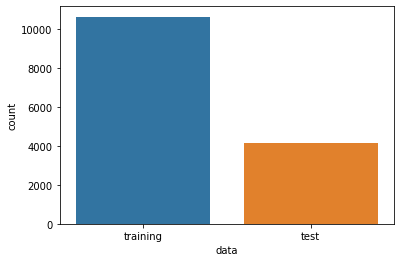

In [1168]:
sns.countplot(x = "data"  , data = df)
plt.show()

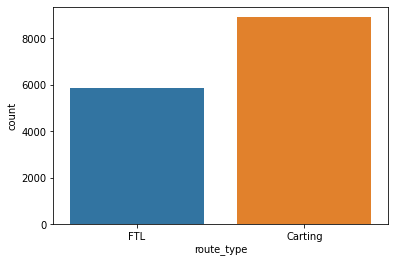

In [1169]:
sns.countplot(x = "route_type" , data = df)
plt.show()

# **Bivariate Analysis**

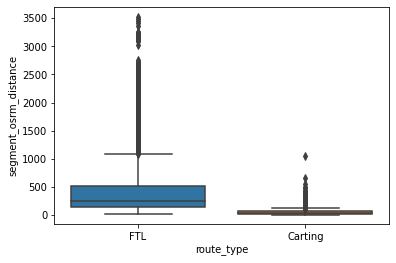

In [1170]:
sns.boxplot(data = df , y = "segment_osrm_distance",  x = "route_type")
plt.show()

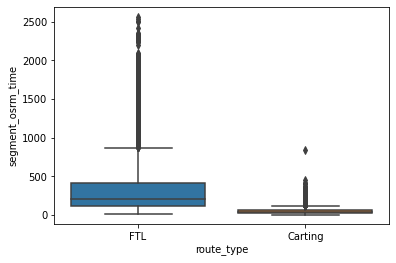

In [1171]:
sns.boxplot(data = df , y = "segment_osrm_time",  x = "route_type")
plt.show()

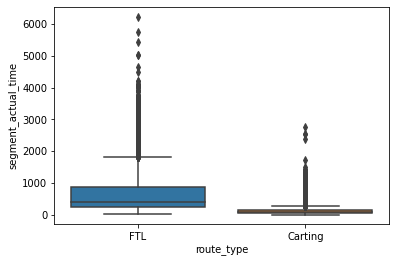

In [1172]:
sns.boxplot(data = df , y = "segment_actual_time" ,  x = "route_type")
plt.show()

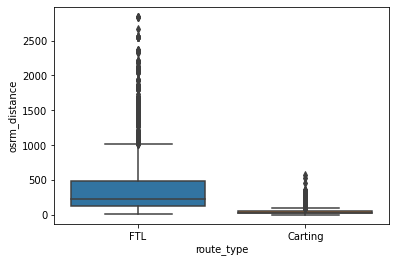

In [1173]:
sns.boxplot(data = df , y = "osrm_distance",  x = "route_type")
plt.show()

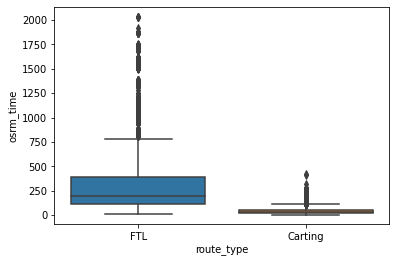

In [1174]:
sns.boxplot(data = df , y = "osrm_time",  x = "route_type")
plt.show()

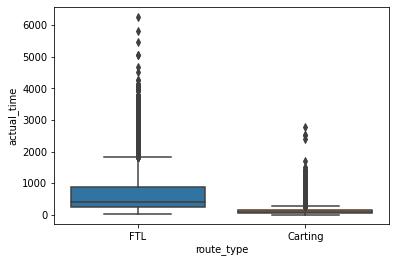

In [1175]:
sns.boxplot(data = df , y = "actual_time",  x = "route_type")
plt.show()

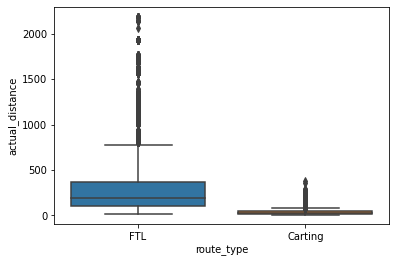

In [1176]:
sns.boxplot(data = df , y = "actual_distance",  x = "route_type")
plt.show()

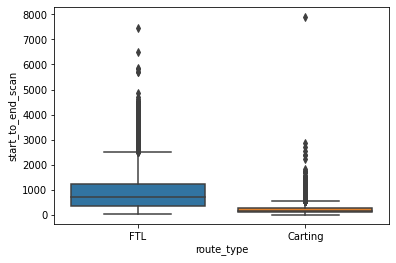

In [1177]:
sns.boxplot(data = df , y = "start_to_end_scan",  x = "route_type")
plt.show()

# **Multivariate Analysis**

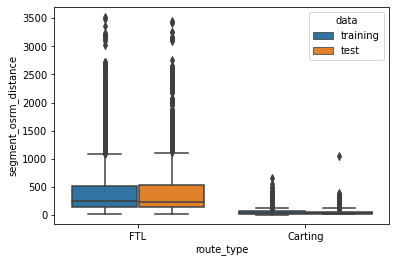

In [1178]:
sns.boxplot(data = df , y = "segment_osrm_distance",  x = "route_type",  hue = "data" )
plt.show()

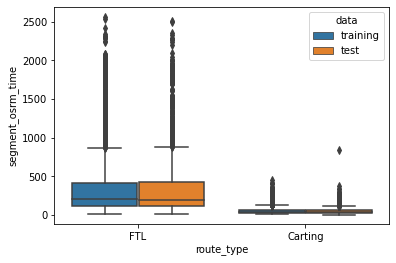

In [1179]:
sns.boxplot(data = df , y = "segment_osrm_time",  x = "route_type",  hue = "data")
plt.show()

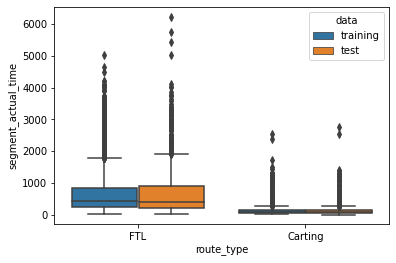

In [1180]:
sns.boxplot(data = df , y = "segment_actual_time" ,  x = "route_type",  hue = "data")
plt.show()

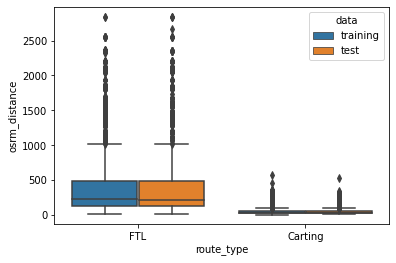

In [1181]:
sns.boxplot(data = df , y = "osrm_distance",  x = "route_type",  hue = "data")
plt.show()

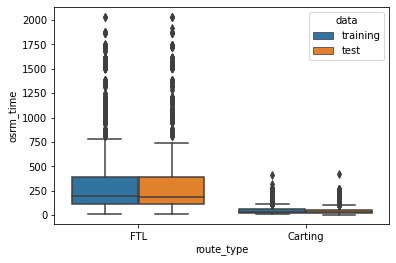

In [1182]:
sns.boxplot(data = df , y = "osrm_time",  x = "route_type",  hue = "data")
plt.show()

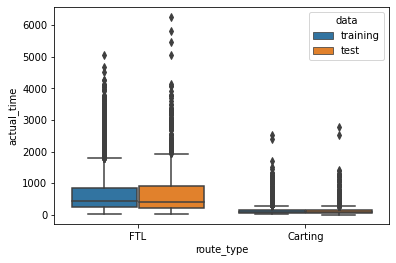

In [1183]:
sns.boxplot(data = df , y = "actual_time",  x = "route_type",  hue = "data")
plt.show()

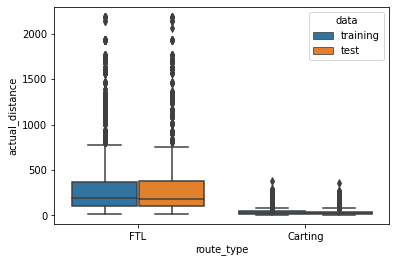

In [1184]:
sns.boxplot(data = df , y = "actual_distance",  x = "route_type",  hue = "data")
plt.show()

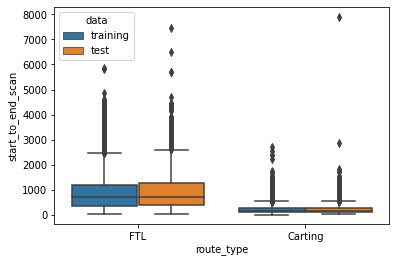

In [1185]:
sns.boxplot(data = df , y = "start_to_end_scan",  x = "route_type",  hue = "data")
plt.show()

# **Extract**

In [1186]:
destination = df["destination_name"].str.split("_" , n=-1 , expand = True)

In [1187]:
df["destination_city"] = destination[0]
df["destination_city"]

trip_uuid
trip-153671041653548748        Gurgaon
trip-153671042288605164     Chikblapur
trip-153671043369099517     Chandigarh
trip-153671046011330457         Mumbai
trip-153671052974046625        Bellary
                              ...     
trip-153861095625827784     Chandigarh
trip-153861104386292051      Faridabad
trip-153861106442901555         Kanpur
trip-153861115439069069    Tirunelveli
trip-153861118270144424        Bellary
Name: destination_city, Length: 14787, dtype: object

In [1188]:
len(df["destination_city"])

14787

In [1189]:
df["destination_place"] = destination[1]
df["destination_place"]

trip_uuid
trip-153671041653548748          Bilaspur
trip-153671042288605164          ShntiSgr
trip-153671043369099517          Mehmdpur
trip-153671046011330457            MiraRd
trip-153671052974046625    Dc (Karnataka)
                                ...      
trip-153861095625827784          Mehmdpur
trip-153861104386292051           Blbgarh
trip-153861106442901555           Central
trip-153861115439069069          VdkkuSrt
trip-153861118270144424    Dc (Karnataka)
Name: destination_place, Length: 14787, dtype: object

In [1190]:
len(df["destination_place"])

14787

In [1191]:
df["destination_code"] = destination[2]
df["destination_code"]

trip_uuid
trip-153671041653548748        HB (Haryana)
trip-153671042288605164       D (Karnataka)
trip-153671043369099517          H (Punjab)
trip-153671046011330457    IP (Maharashtra)
trip-153671052974046625                None
                                 ...       
trip-153861095625827784          H (Punjab)
trip-153861104386292051        DC (Haryana)
trip-153861106442901555                   H
trip-153861115439069069      I (Tamil Nadu)
trip-153861118270144424                None
Name: destination_code, Length: 14787, dtype: object

In [1192]:
len(df["destination_code"])

14787

In [1193]:
source = df["source_name"].str.split("_" , n=-1 , expand = True)

In [1194]:
df["source_city"] = source[0]
df["source_city"]

trip_uuid
trip-153671041653548748                      Bhopal
trip-153671042288605164                      Tumkur
trip-153671043369099517                   Bangalore
trip-153671046011330457    Mumbai Hub (Maharashtra)
trip-153671052974046625                     Bellary
                                     ...           
trip-153861095625827784                  Chandigarh
trip-153861104386292051                         FBD
trip-153861106442901555                      Kanpur
trip-153861115439069069                 Tirunelveli
trip-153861118270144424          Hospet (Karnataka)
Name: source_city, Length: 14787, dtype: object

In [1195]:
len(df["source_city"])

14787

In [1196]:
df["source_place"] = source[1]
df["source_place"]

trip_uuid
trip-153671041653548748          Trnsport
trip-153671042288605164          Veersagr
trip-153671043369099517          Nelmngla
trip-153671046011330457              None
trip-153671052974046625    Dc (Karnataka)
                                ...      
trip-153861095625827784          Mehmdpur
trip-153861104386292051        Balabhgarh
trip-153861106442901555           Central
trip-153861115439069069          VdkkuSrt
trip-153861118270144424              None
Name: source_place, Length: 14787, dtype: object

In [1197]:
len(df["source_place"])

14787

In [1198]:
df["source_code"] = source[2]
df["source_code"]

trip_uuid
trip-153671041653548748    H (Madhya Pradesh)
trip-153671042288605164         I (Karnataka)
trip-153671043369099517         H (Karnataka)
trip-153671046011330457                  None
trip-153671052974046625                  None
                                  ...        
trip-153861095625827784            H (Punjab)
trip-153861104386292051         DPC (Haryana)
trip-153861106442901555                     H
trip-153861115439069069        I (Tamil Nadu)
trip-153861118270144424                  None
Name: source_code, Length: 14787, dtype: object

In [1199]:
len(df["source_code"])

14787

In [1200]:
trip = df["trip_creation_time"].str.split(" " , n=-1 , expand = True)

In [1201]:
df["trip_creation_date"] = trip[0]
df["trip_creation_date"]

trip_uuid
trip-153671041653548748    2018-09-12
trip-153671042288605164    2018-09-12
trip-153671043369099517    2018-09-12
trip-153671046011330457    2018-09-12
trip-153671052974046625    2018-09-12
                              ...    
trip-153861095625827784    2018-10-03
trip-153861104386292051    2018-10-03
trip-153861106442901555    2018-10-03
trip-153861115439069069    2018-10-03
trip-153861118270144424    2018-10-03
Name: trip_creation_date, Length: 14787, dtype: object

In [1202]:
len(df["trip_creation_date"])

14787

In [1203]:
df["trip_creation_timing"] = trip[1]
df["trip_creation_timing"]

trip_uuid
trip-153671041653548748    00:00:16.535741
trip-153671042288605164    00:00:22.886430
trip-153671043369099517    00:00:33.691250
trip-153671046011330457    00:01:00.113710
trip-153671052974046625    00:02:09.740725
                                ...       
trip-153861095625827784    23:55:56.258533
trip-153861104386292051    23:57:23.863155
trip-153861106442901555    23:57:44.429324
trip-153861115439069069    23:59:14.390954
trip-153861118270144424    23:59:42.701692
Name: trip_creation_timing, Length: 14787, dtype: object

In [1204]:
len(df["trip_creation_timing"])

14787

In [1205]:
date = df["trip_creation_date"].str.split("-" , n=-1 , expand = True)

In [1206]:
df["trip_year"] = date[0]
df["trip_year"]

trip_uuid
trip-153671041653548748    2018
trip-153671042288605164    2018
trip-153671043369099517    2018
trip-153671046011330457    2018
trip-153671052974046625    2018
                           ... 
trip-153861095625827784    2018
trip-153861104386292051    2018
trip-153861106442901555    2018
trip-153861115439069069    2018
trip-153861118270144424    2018
Name: trip_year, Length: 14787, dtype: object

In [1207]:
len(df["trip_year"])

14787

In [1208]:
df["trip_month"] = date[1]
df["trip_month"]

trip_uuid
trip-153671041653548748    09
trip-153671042288605164    09
trip-153671043369099517    09
trip-153671046011330457    09
trip-153671052974046625    09
                           ..
trip-153861095625827784    10
trip-153861104386292051    10
trip-153861106442901555    10
trip-153861115439069069    10
trip-153861118270144424    10
Name: trip_month, Length: 14787, dtype: object

In [1209]:
len(df["trip_month"])

14787

In [1210]:
df["trip_day"] = date[2]
df["trip_day"]

trip_uuid
trip-153671041653548748    12
trip-153671042288605164    12
trip-153671043369099517    12
trip-153671046011330457    12
trip-153671052974046625    12
                           ..
trip-153861095625827784    03
trip-153861104386292051    03
trip-153861106442901555    03
trip-153861115439069069    03
trip-153861118270144424    03
Name: trip_day, Length: 14787, dtype: object

In [1211]:
len(df["trip_day"])

14787

# ***Time Column***

In [1212]:
from datetime import datetime
import time

In [1213]:
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_start_time"]

trip_uuid
trip-153671041653548748   2018-09-12 00:00:16.535741
trip-153671042288605164   2018-09-12 00:00:22.886430
trip-153671043369099517   2018-09-12 00:00:33.691250
trip-153671046011330457   2018-09-12 00:01:00.113710
trip-153671052974046625   2018-09-12 00:02:09.740725
                                     ...            
trip-153861095625827784   2018-10-03 23:55:56.258533
trip-153861104386292051   2018-10-03 23:57:23.863155
trip-153861106442901555   2018-10-03 23:57:44.429324
trip-153861115439069069   2018-10-03 23:59:14.390954
trip-153861118270144424   2018-10-04 02:51:44.712656
Name: od_start_time, Length: 14787, dtype: datetime64[ns]

In [1214]:
df["od_end_time"] = pd.to_datetime(df["od_end_time"])
df["od_end_time"]

trip_uuid
trip-153671041653548748   2018-09-13 13:40:23.123744
trip-153671042288605164   2018-09-12 03:01:59.598855
trip-153671043369099517   2018-09-14 17:34:55.442454
trip-153671046011330457   2018-09-12 01:41:29.809822
trip-153671052974046625   2018-09-12 12:00:30.683231
                                     ...            
trip-153861095625827784   2018-10-04 06:41:25.409035
trip-153861104386292051   2018-10-04 00:57:59.294434
trip-153861106442901555   2018-10-04 06:59:51.621332
trip-153861115439069069   2018-10-04 05:47:45.162682
trip-153861118270144424   2018-10-04 08:46:09.166940
Name: od_end_time, Length: 14787, dtype: datetime64[ns]

In [1215]:
df["time_taken"] = (df["od_end_time"] - df["od_start_time"]).dt.seconds/60
df["time_taken"]
#in minutes

trip_uuid
trip-153671041653548748     820.100000
trip-153671042288605164     181.600000
trip-153671043369099517    1054.350000
trip-153671046011330457     100.483333
trip-153671052974046625     718.333333
                              ...     
trip-153861095625827784     405.483333
trip-153861104386292051      60.583333
trip-153861106442901555     422.116667
trip-153861115439069069     348.500000
trip-153861118270144424     354.400000
Name: time_taken, Length: 14787, dtype: float64

In [1216]:
ttest_rel(df["time_taken"] , df["start_to_end_scan"])

Ttest_relResult(statistic=-28.719283283569606, pvalue=1.47782698161826e-176)

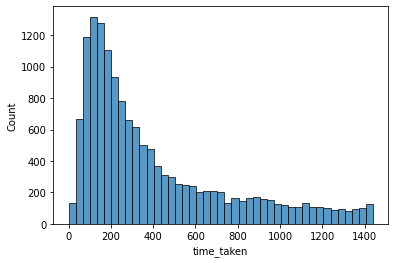

In [1217]:
sns.histplot(x = "time_taken"  , data = df)

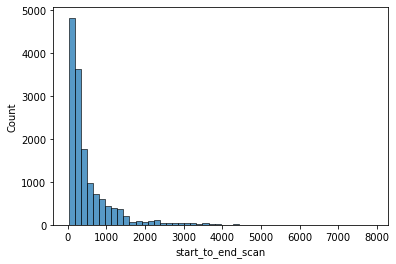

In [1218]:
sns.histplot(x = "start_to_end_scan", bins = 50 , data = df)

In [1219]:
df.head()

,data,route_schedule_uuid,trip_creation_time,route_type,source_centre,source_name,destination_centre,destination_name,od_start_time,od_end_time,...,destination_code,source_city,source_place,source_code,trip_creation_date,trip_creation_timing,trip_year,trip_month,trip_day,time_taken
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,...,HB (Haryana),Bhopal,Trnsport,H (Madhya Pradesh),2018-09-12,00:00:16.535741,2018,09,12,820.100000
trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,...,D (Karnataka),Tumkur,Veersagr,I (Karnataka),2018-09-12,00:00:22.886430,2018,09,12,181.600000
trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,...,H (Punjab),Bangalore,Nelmngla,H (Karnataka),2018-09-12,00:00:33.691250,2018,09,12,1054.350000
trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,2018-09-12 00:01:00.113710,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,...,IP (Maharashtra),Mumbai Hub (Maharashtra),None,None,2018-09-12,00:01:00.113710,2018,09,12,100.483333
trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,2018-09-12 00:02:09.740725,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,...,None,Bellary,Dc (Karnataka),None,2018-09-12,00:02:09.740725,2018,09,12,718.333333


# ***Range Attributes***

In [1220]:
df["time_taken"].min()

0.25

In [1221]:
df["time_taken"].max()

1439.6833333333334

In [1222]:
df["start_to_end_scan"].min()

23.0

In [1223]:
df["start_to_end_scan"].max()

7898.0

In [1224]:
df["actual_distance"].min()

9.00246144174878

In [1225]:
df["actual_distance"].max()

2186.531787238833

In [1226]:
df["actual_time"].min()

9.0

In [1227]:
df["actual_time"].max()

6265.0

In [1228]:
df["osrm_time"].min()

6.0

In [1229]:
df["osrm_time"].max()

2032.0

In [1230]:
df["osrm_distance"].min()

9.0729

In [1231]:
df["osrm_distance"].max()

2840.081

In [1232]:
df["segment_actual_time"].min()

9.0

In [1233]:
df["segment_actual_time"].max()

6230.0

In [1234]:
df["segment_osrm_time"].min()

6.0

In [1235]:
df["segment_osrm_time"].max()

2564.0

In [1236]:
df["segment_osrm_distance"].min()

9.0729

In [1237]:
df["segment_osrm_distance"].max()

3523.6323999999995

# **Hypothesis Testing**

 ***Actual_time*** aggregated value and ***OSRM time*** aggregated value

---

---



---





In [1238]:
df["actual_time"].mean()

356.30601203760057

In [1239]:
df["osrm_time"].mean()

160.99093798606884

***Null Hypothesis*** -   Actual_time aggregated value and OSRM time aggregated value is NOT Correlated.

***Alternate Hypothesis*** - Actual_time aggregated value and OSRM time aggregated value is Correlated.

In [1240]:
ttest_ind(df["actual_time"] , df["osrm_time"])

Ttest_indResult(statistic=38.080715677235965, pvalue=8.2146191343447e-310)

**Note** - Reject Null Hypothesis because P-value is Low. So, we can say that it is statistically significant at 99% Confidence also that means Actual_time aggregated value and OSRM time aggregated value is Correlated.

***Actual_time*** aggregated value and ***Segment Actual time*** aggregated 




---


---



---



In [1241]:
df["actual_time"].mean()

356.30601203760057

In [1242]:
df["segment_actual_time"].mean()

353.0591735984311

***Null Hypothesis*** -   Actual time aggregated value and Segment Actual time aggregated value is NOT Correlated.

***Alternate Hypothesis*** - Actual time aggregated value and Segment Actual time aggregated value is Correlated.

In [1243]:
ttest_ind(df["actual_time"] , df["segment_actual_time"])

Ttest_indResult(statistic=0.499475764573994, pvalue=0.6174479719707524)

**Note** - Fail to Reject Null Hypothesis because P-value is High. So, we can say that it is NOT statistically significant at 90% Confidence also that means Actual_time aggregated value and Segment Actual time aggregated value is NOT Correlated.

***OSRM Distance*** aggregated value and ***Segment OSRM Distance*** aggregated 



---



---



---



In [1244]:
df["osrm_distance"].mean()

203.88741124636508

In [1245]:
df["segment_osrm_distance"].mean()

222.7054664434977

***Null Hypothesis*** -   OSRM Distance aggregated value and Segment OSRM Distance aggregated value is NOT Correlated.

***Alternate Hypothesis*** - OSRM Distance aggregated value and Segment OSRM Distance aggregated value is Correlated.

In [1246]:
ttest_ind(df["osrm_distance"] , df["segment_osrm_distance"])

Ttest_indResult(statistic=-4.102786976805513, pvalue=4.0929578191203324e-05)

**Note** - Reject Null Hypothesis because P-value is Low. So, we can say that it is statistically significant at 99% Confidence also that means OSRM Distance aggregated value and Segment OSRM Distance aggregated value is Correlated.

***OSRM time*** aggregated value and ***Segment OSRM time*** aggregated value

---



---



---



In [1247]:
df["osrm_time"].mean()

160.99093798606884

In [1248]:
df["segment_osrm_time"].mean()

180.5115980252925

***Null Hypothesis*** -  OSRM time aggregated value and Segment OSRM time aggregated value is NOT Correlated.

***Alternate Hypothesis*** - OSRM time aggregated value and Segment OSRM time aggregated value is Correlated.

In [1249]:
ttest_ind(df["osrm_time"] , df["segment_osrm_time"])

Ttest_indResult(statistic=-5.711782161676085, pvalue=1.128703468644937e-08)

**Note** - Reject Null Hypothesis because P-value is Low. So, we can say that it is statistically significant at 99% Confidence also that means OSRM time aggregated value and Segment OSRM time aggregated value is Correlated.

# **## Outliers ##**

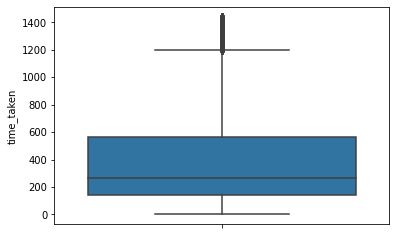

In [1250]:
sns.boxplot(data = df , y = "time_taken")
plt.show()

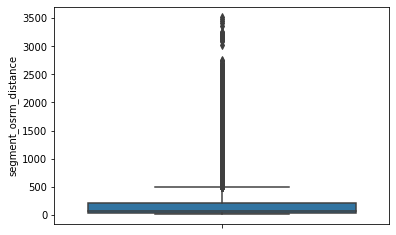

In [1251]:
sns.boxplot(data = df , y = "segment_osrm_distance")
plt.show()

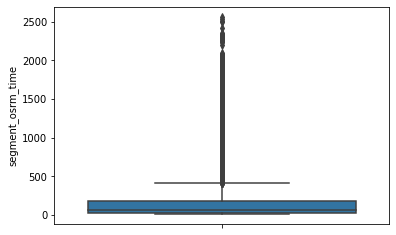

In [1252]:
sns.boxplot(data = df , y = "segment_osrm_time")
plt.show()

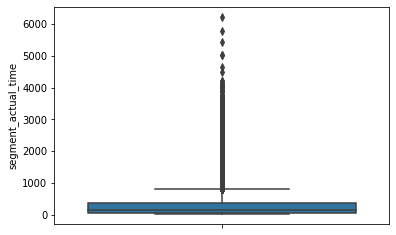

In [1253]:
sns.boxplot(data = df , y = "segment_actual_time")
plt.show()

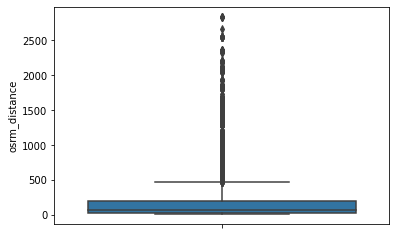

In [1254]:
sns.boxplot(data = df , y = "osrm_distance")
plt.show()

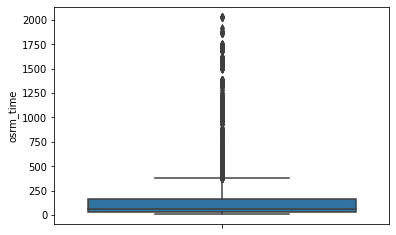

In [1255]:
sns.boxplot(data = df , y = "osrm_time")
plt.show()

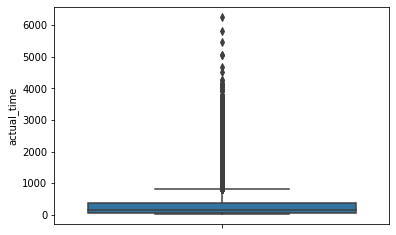

In [1256]:
sns.boxplot(data = df , y = "actual_time")
plt.show()

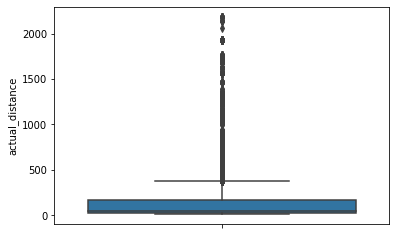

In [1257]:
sns.boxplot(data = df , y = "actual_distance")
plt.show()

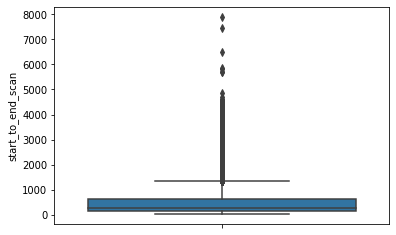

In [1258]:
sns.boxplot(data = df , y = "start_to_end_scan")
plt.show()

# **Time Taken** Outliers 

In [1259]:
df["time_taken"].mean()

403.06075381528825

In [1260]:
df["time_taken"].min()

0.25

In [1261]:
df["time_taken"].max()

1439.6833333333334

In [1262]:
a = np.percentile(df["time_taken"] , 25)
a

144.30833333333334

In [1263]:
b = np.percentile(df["time_taken"] , 50)
b

267.65

In [1264]:
c = np.percentile(df["time_taken"] , 75)
c

564.4666666666667

In [1265]:
iqr = c-a
iqr

420.15833333333336

In [1266]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [1267]:
upper = (c+1.5*iqr)
upper

1194.7041666666669

In [1268]:
outlier = df[(df["time_taken"] < lower) | (df["time_taken"] > upper)]
len(outlier)

723

In [1269]:
no_outlier = df[(df["time_taken"] >= lower) & (df["time_taken"] <= upper)]
len(no_outlier)

14064

In [1270]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

4.889429904645973

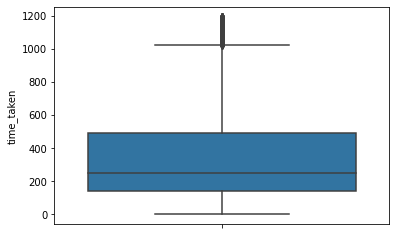

In [1271]:
sns.boxplot(y = "time_taken" , data = no_outlier)
plt.show()

# **Segment_OSRM_Distance** Outliers 

In [1272]:
df["segment_osrm_distance"].mean()

222.7054664434977

In [1273]:
df["segment_osrm_distance"].min()

9.0729

In [1274]:
df["segment_osrm_distance"].max()

3523.6323999999995

In [1275]:
a = np.percentile(df["segment_osrm_distance"] , 25)
a

32.57885

In [1276]:
b = np.percentile(df["segment_osrm_distance"] , 50)
b

69.7842

In [1277]:
c = np.percentile(df["segment_osrm_distance"] , 75)
c

216.5606

In [1278]:
iqr = c-a
iqr

183.98174999999998

In [1279]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [1280]:
upper = (c+1.5*iqr)
upper

492.533225

In [1281]:
outlier = df[(df["segment_osrm_distance"] < lower) | (df["segment_osrm_distance"] > upper)]
len(outlier)

1550

In [1282]:
no_outlier = df[(df["segment_osrm_distance"] >= lower) & (df["segment_osrm_distance"] <= upper)]
len(no_outlier)

13237

In [1283]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

10.482180293501047

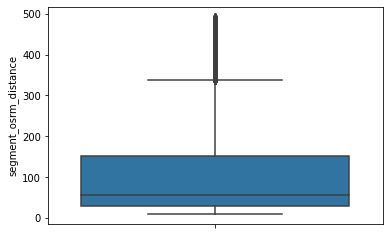

In [1284]:
sns.boxplot(y = "segment_osrm_distance" , data = no_outlier)
plt.show()

# **Segment_OSRM_time** Outliers 

In [1285]:
df["segment_osrm_time"].mean()

180.5115980252925

In [1286]:
df["segment_osrm_time"].min()

6.0

In [1287]:
df["segment_osrm_time"].max()

2564.0

In [1288]:
a = np.percentile(df["segment_osrm_time"] , 25)
a

30.0

In [1289]:
b = np.percentile(df["segment_osrm_time"] , 50)
b

65.0

In [1290]:
c = np.percentile(df["segment_osrm_time"] , 75)
c

184.0

In [1291]:
iqr = c-a
iqr

154.0

In [1292]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [1293]:
upper = (c+1.5*iqr)
upper

415.0

In [1294]:
outlier = df[(df["segment_osrm_time"] < lower) | (df["segment_osrm_time"] > upper)]
len(outlier)

1485

In [1295]:
no_outlier = df[(df["segment_osrm_time"] >= lower) & (df["segment_osrm_time"] <= upper)]
len(no_outlier)

13302

In [1296]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

10.042604990870359

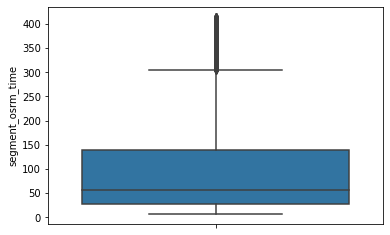

In [1297]:
sns.boxplot(y = "segment_osrm_time" , data = no_outlier)
plt.show()

# **Segment_Actual_time** Outliers 

In [1298]:
df["segment_actual_time"].mean()

353.0591735984311

In [1299]:
df["segment_actual_time"].min()

9.0

In [1300]:
df["segment_actual_time"].max()

6230.0

In [1301]:
a = np.percentile(df["segment_actual_time"] , 25)
a

66.0

In [1302]:
b = np.percentile(df["segment_actual_time"] , 50)
b

147.0

In [1303]:
c = np.percentile(df["segment_actual_time"] , 75)
c

364.0

In [1304]:
iqr = c-a
iqr

298.0

In [1305]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [1306]:
upper = (c+1.5*iqr)
upper

811.0

In [1307]:
outlier = df[(df["segment_actual_time"] < lower) | (df["segment_actual_time"] > upper)]
len(outlier)

1644

In [1308]:
no_outlier = df[(df["segment_actual_time"] >= lower) & (df["segment_actual_time"] <= upper)]
len(no_outlier)

13143

In [1309]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

11.11787380807466

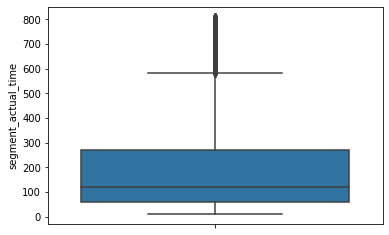

In [1310]:
sns.boxplot(y = "segment_actual_time" , data = no_outlier)
plt.show()

# **OSRM_distance** Outliers 

In [1311]:
df["osrm_distance"].mean()

203.88741124636508

In [1312]:
df["osrm_distance"].min()

9.0729

In [1313]:
df["osrm_distance"].max()

2840.081

In [1314]:
a = np.percentile(df["osrm_distance"] , 25)
a

30.7569

In [1315]:
b = np.percentile(df["osrm_distance"] , 50)
b

65.30279999999999

In [1316]:
c = np.percentile(df["osrm_distance"] , 75)
c

206.6442

In [1317]:
iqr = c-a
iqr

175.8873

In [1318]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [1319]:
upper = (c+1.5*iqr)
upper

470.47515000000004

In [1320]:
outlier = df[(df["osrm_distance"] < lower) | (df["osrm_distance"] > upper)]
len(outlier)

1522

In [1321]:
no_outlier = df[(df["osrm_distance"] >= lower) & (df["osrm_distance"] <= upper)]
len(no_outlier)

13265

In [1322]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

10.292824778521673

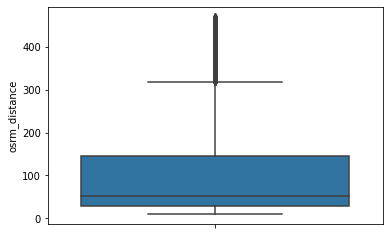

In [1323]:
sns.boxplot(y = "osrm_distance" , data = no_outlier)
plt.show()

# **OSRM_time** Outliers 

In [1324]:
df["osrm_time"].mean()

160.99093798606884

In [1325]:
df["osrm_time"].min()

6.0

In [1326]:
df["osrm_time"].max()

2032.0

In [1327]:
a = np.percentile(df["osrm_time"] , 25)
a

29.0

In [1328]:
b = np.percentile(df["osrm_time"] , 50)
b

60.0

In [1329]:
c = np.percentile(df["osrm_time"] , 75)
c

168.0

In [1330]:
iqr = c-a
iqr

139.0

In [1331]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [1332]:
upper = (c+1.5*iqr)
upper

376.5

In [1333]:
outlier = df[(df["osrm_time"] < lower) | (df["osrm_time"] > upper)]
len(outlier)

1506

In [1334]:
no_outlier = df[(df["osrm_time"] >= lower) & (df["osrm_time"] <= upper)]
len(no_outlier)

13281

In [1335]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

10.184621627104889

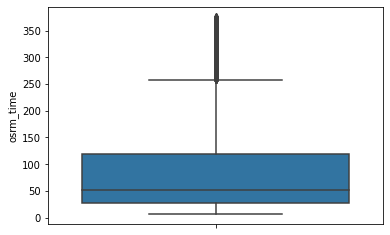

In [1336]:
sns.boxplot(y = "osrm_time" , data = no_outlier)
plt.show()

# **Actual_Time** Outliers 

In [1337]:
df["actual_time"].mean()

356.30601203760057

In [1338]:
df["actual_time"].min()

9.0

In [1339]:
df["actual_time"].max()

6265.0

In [1340]:
a = np.percentile(df["actual_time"] , 25)
a

67.0

In [1341]:
b = np.percentile(df["actual_time"] , 50)
b

148.0

In [1342]:
c = np.percentile(df["actual_time"] , 75)
c

367.0

In [1343]:
iqr = c-a
iqr

300.0

In [1344]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [1345]:
upper = (c+1.5*iqr)
upper

817.0

In [1346]:
outlier = df[(df["actual_time"] < lower) | (df["actual_time"] > upper)]
len(outlier)

1646

In [1347]:
no_outlier = df[(df["actual_time"] >= lower) & (df["actual_time"] <= upper)]
len(no_outlier)

13141

In [1348]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

11.13139920200176

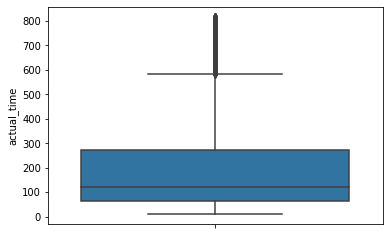

In [1349]:
sns.boxplot(y = "actual_time" , data = no_outlier)
plt.show()

# **Actual_Distance** Outliers 

In [1350]:
df["actual_distance"].mean()

164.0901961720598

In [1351]:
df["actual_distance"].min()

9.00246144174878

In [1352]:
df["actual_distance"].max()

2186.531787238833

In [1353]:
a = np.percentile(df["actual_distance"] , 25)
a

22.777098943155323

In [1354]:
b = np.percentile(df["actual_distance"] , 50)
b

48.28789422162633

In [1355]:
c = np.percentile(df["actual_distance"] , 75)
c

163.5912581579725

In [1356]:
iqr = c-a
iqr

140.81415921481718

In [1357]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [1358]:
upper = (c+1.5*iqr)
upper

374.81249698019826

In [1359]:
outlier = df[(df["actual_distance"] < lower) | (df["actual_distance"] > upper)]
len(outlier)

1452

In [1360]:
no_outlier = df[(df["actual_distance"] >= lower) & (df["actual_distance"] <= upper)]
len(no_outlier)

13335

In [1361]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

9.81943599107324

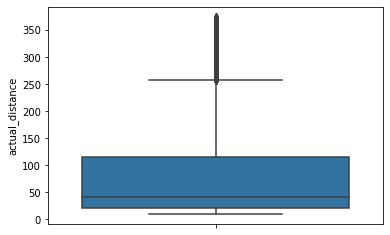

In [1362]:
sns.boxplot(y = "actual_distance" , data = no_outlier)
plt.show()

# **Start_To_End_Scan** Outliers 

In [1363]:
df["start_to_end_scan"].mean()

529.4290254953676

In [1364]:
df["start_to_end_scan"].min()

23.0

In [1365]:
df["start_to_end_scan"].max()

7898.0

In [1366]:
a = np.percentile(df["start_to_end_scan"] , 25)
a

149.0

In [1367]:
b = np.percentile(df["start_to_end_scan"] , 50)
b

279.0

In [1368]:
c = np.percentile(df["start_to_end_scan"] , 75)
c

632.0

In [1369]:
iqr = c-a
iqr

483.0

In [1370]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [1371]:
upper = (c+1.5*iqr)
upper

1356.5

In [1372]:
outlier = df[(df["start_to_end_scan"] < lower) | (df["start_to_end_scan"] > upper)]
len(outlier)

1282

In [1373]:
no_outlier = df[(df["start_to_end_scan"] >= lower) & (df["start_to_end_scan"] <= upper)]
len(no_outlier)

13505

In [1374]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

8.669777507269899

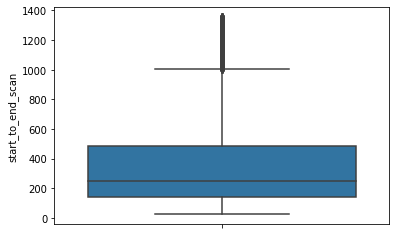

In [1375]:
sns.boxplot(y = "start_to_end_scan" , data = no_outlier)
plt.show()

# ***Encoding***

In [1376]:
df[["route__Carting" , "route__FTL"]] = pd.get_dummies(df.route_type, prefix='route_')


In [1377]:
df[["route__Carting" , "route__FTL"]]

,route__Carting,route__FTL
trip_uuid,,
trip-153671041653548748,0,1
trip-153671042288605164,1,0
trip-153671043369099517,0,1
trip-153671046011330457,1,0
trip-153671052974046625,0,1
...,...,...
trip-153861095625827784,1,0
trip-153861104386292051,1,0
trip-153861106442901555,1,0


In [1378]:
df[["data__test"	, "data__training"]] = pd.get_dummies(df.data, prefix='data_')

In [1379]:
df[["data__test"	, "data__training"]]

,data__test,data__training
trip_uuid,,
trip-153671041653548748,0,1
trip-153671042288605164,0,1
trip-153671043369099517,0,1
trip-153671046011330457,0,1
trip-153671052974046625,0,1
...,...,...
trip-153861095625827784,1,0
trip-153861104386292051,1,0
trip-153861106442901555,1,0


# **## Standard Scaler ##**

# ***Time_Taken and Start_to_End_Scan***

In [1380]:
df_start_end = df[["time_taken" , "start_to_end_scan"]]

In [1381]:
df_start_end.head()

,time_taken,start_to_end_scan
trip_uuid,,
trip-153671041653548748,820.100000,2259.0
trip-153671042288605164,181.600000,180.0
trip-153671043369099517,1054.350000,3933.0
trip-153671046011330457,100.483333,100.0
trip-153671052974046625,718.333333,717.0


In [1382]:
df_start_end.mean()

time_taken           403.060754
start_to_end_scan    529.429025
dtype: float64

In [1383]:
df_start_end.std()

time_taken           350.158002
start_to_end_scan    658.254936
dtype: float64

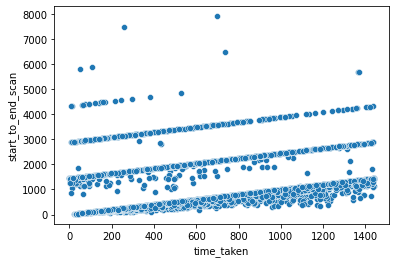

In [1384]:
sns.scatterplot(x = df_start_end["time_taken"] , y = df_start_end["start_to_end_scan"])
plt.show()

In [1385]:
df_start_end_ss = StandardScaler().fit_transform(df_start_end)
type(df_start_end_ss)

numpy.ndarray

In [1386]:
df_start_end_ss = pd.DataFrame(df_start_end_ss , columns = ["time_taken" , "start_to_end_scan"])

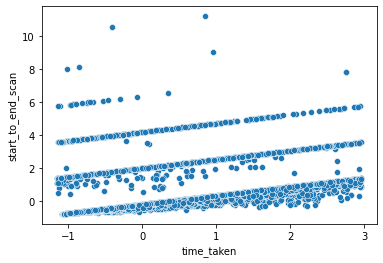

In [1387]:
sns.scatterplot(x = df_start_end_ss["time_taken"] , y = df_start_end_ss["start_to_end_scan"])
plt.show()

In [1388]:
df_start_end_ss.mean()

time_taken          -1.484802e-16
start_to_end_scan   -2.258437e-17
dtype: float64

In [1389]:
df_start_end_ss.std()

time_taken           1.000034
start_to_end_scan    1.000034
dtype: float64

# ***Actual_Time and Segment_Actual_Time***

In [1390]:
df_actual_time = df[["actual_time" , "segment_actual_time"]]

In [1391]:
df_actual_time.head()

,actual_time,segment_actual_time
trip_uuid,,
trip-153671041653548748,1562.0,1548.0
trip-153671042288605164,143.0,141.0
trip-153671043369099517,3347.0,3308.0
trip-153671046011330457,59.0,59.0
trip-153671052974046625,341.0,340.0


In [1392]:
df_actual_time.mean()

actual_time            356.306012
segment_actual_time    353.059174
dtype: float64

In [1393]:
df_actual_time.std()

actual_time            561.517936
segment_actual_time    556.365911
dtype: float64

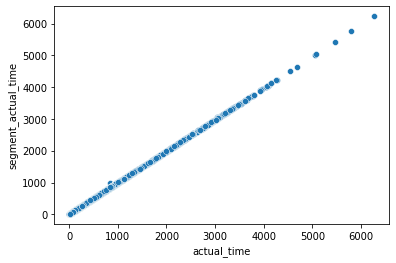

In [1394]:
sns.scatterplot(x = df_actual_time["actual_time"] , y = df_actual_time["segment_actual_time"])
plt.show()

In [1395]:
df_actual_time_ss = StandardScaler().fit_transform(df_actual_time)
type(df_actual_time_ss)

numpy.ndarray

In [1396]:
df_actual_time_ss = pd.DataFrame(df_actual_time_ss , columns = ["actual_time" , "segment_actual_time"])

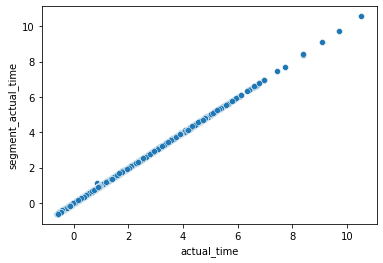

In [1397]:
sns.scatterplot(x = df_actual_time_ss["actual_time"] , y = df_actual_time_ss["segment_actual_time"])
plt.show()

In [1398]:
df_actual_time_ss.mean()

actual_time            5.670119e-17
segment_actual_time   -2.979215e-17
dtype: float64

In [1399]:
df_actual_time_ss.std()

actual_time            1.000034
segment_actual_time    1.000034
dtype: float64

# ***OSRM_Time and Segment_OSRM_Time***

In [1400]:
df_osrm_time = df[["osrm_time" , "segment_osrm_time"]]

In [1401]:
df_osrm_time.head()

,osrm_time,segment_osrm_time
trip_uuid,,
trip-153671041653548748,717.0,1008.0
trip-153671042288605164,68.0,65.0
trip-153671043369099517,1740.0,1941.0
trip-153671046011330457,15.0,16.0
trip-153671052974046625,117.0,115.0


In [1402]:
df_osrm_time.mean()

osrm_time            160.990938
segment_osrm_time    180.511598
dtype: float64

In [1403]:
df_osrm_time.std()

osrm_time            271.459495
segment_osrm_time    314.679279
dtype: float64

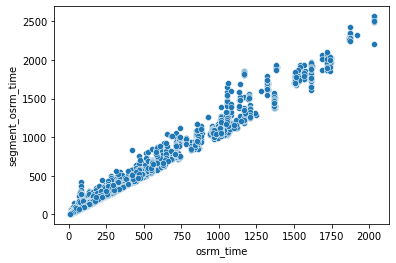

In [1404]:
sns.scatterplot(x = df_osrm_time["osrm_time"] , y = df_osrm_time["segment_osrm_time"])
plt.show()

In [1405]:
df_osrm_time_ss = StandardScaler().fit_transform(df_osrm_time)
type(df_osrm_time_ss)

numpy.ndarray

In [1406]:
df_osrm_time_ss = pd.DataFrame(df_osrm_time_ss , columns = ["osrm_time" , "segment_osrm_time"])

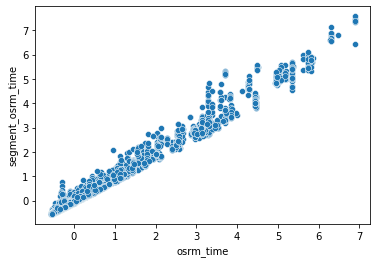

In [1407]:
sns.scatterplot(x = df_osrm_time_ss["osrm_time"] , y = df_osrm_time_ss["segment_osrm_time"])
plt.show()

In [1408]:
df_osrm_time_ss.mean()

osrm_time            1.105193e-17
segment_osrm_time   -5.093496e-17
dtype: float64

In [1409]:
df_osrm_time_ss.std()

osrm_time            1.000034
segment_osrm_time    1.000034
dtype: float64

# ***OSRM_Distance and Segment_OSRM_Distance***

In [1410]:
df_osrm_distance = df[["osrm_distance" , "segment_osrm_distance"]]

In [1411]:
df_osrm_distance.head()

,osrm_distance,segment_osrm_distance
trip_uuid,,
trip-153671041653548748,991.3523,1320.4733
trip-153671042288605164,85.1110,84.1894
trip-153671043369099517,2354.0665,2545.2678
trip-153671046011330457,19.6800,19.8766
trip-153671052974046625,146.7918,146.7919


In [1412]:
df_osrm_distance.mean()

osrm_distance            203.887411
segment_osrm_distance    222.705466
dtype: float64

In [1413]:
df_osrm_distance.std()

osrm_distance            370.565564
segment_osrm_distance    416.846279
dtype: float64

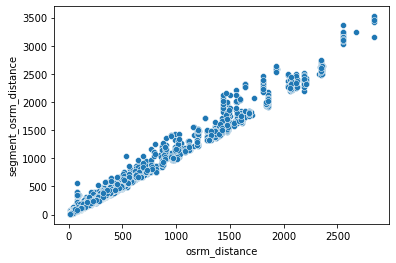

In [1414]:
sns.scatterplot(x = df_osrm_distance["osrm_distance"] , y = df_osrm_distance["segment_osrm_distance"])
plt.show()

In [1415]:
df_osrm_distance_ss = StandardScaler().fit_transform(df_osrm_distance)
type(df_osrm_distance_ss)

numpy.ndarray

In [1416]:
df_osrm_distance_ss = pd.DataFrame(df_osrm_distance_ss , columns = ["osrm_distance" , "segment_osrm_distance"])

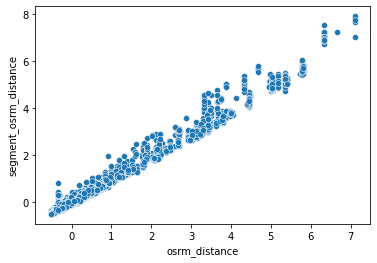

In [1417]:
sns.scatterplot(x = df_osrm_distance_ss["osrm_distance"] , y = df_osrm_distance_ss["segment_osrm_distance"])
plt.show()

In [1418]:
df_osrm_distance_ss.mean()

osrm_distance           -6.102585e-17
segment_osrm_distance   -7.351933e-17
dtype: float64

In [1419]:
df_osrm_distance_ss.std()

osrm_distance            1.000034
segment_osrm_distance    1.000034
dtype: float64

# ***Actual_Time and OSRM_Time***

In [1420]:
df_actual_osrm_time = df[["actual_time" , "osrm_time"]]

In [1421]:
df_actual_osrm_time.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,actual_time,osrm_time
trip_uuid,,
trip-153671041653548748,1562.0,717.0
trip-153671042288605164,143.0,68.0
trip-153671043369099517,3347.0,1740.0
trip-153671046011330457,59.0,15.0
trip-153671052974046625,341.0,117.0


In [1422]:
df_actual_osrm_time.mean()

actual_time    356.306012
osrm_time      160.990938
dtype: float64

In [1423]:
df_actual_osrm_time.std()

actual_time    561.517936
osrm_time      271.459495
dtype: float64

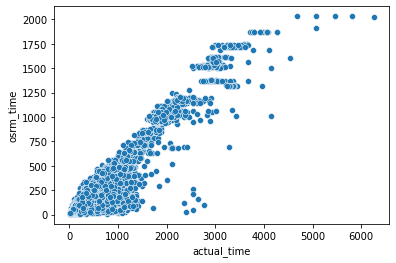

In [1424]:
sns.scatterplot(x = df_actual_osrm_time["actual_time"] , y = df_actual_osrm_time["osrm_time"])
plt.show()

In [1425]:
df_actual_osrm_time_ss = StandardScaler().fit_transform(df_actual_osrm_time)
type(df_actual_osrm_time_ss)

numpy.ndarray

In [1426]:
df_actual_osrm_time_ss = pd.DataFrame(df_actual_osrm_time_ss , columns = ["actual_time" , "osrm_time"])

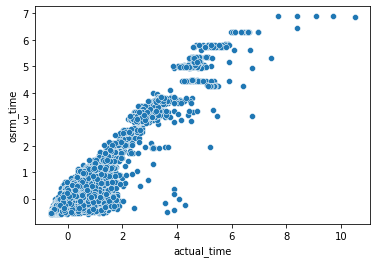

In [1427]:
sns.scatterplot(x = df_actual_osrm_time_ss["actual_time"] , y = df_actual_osrm_time_ss["osrm_time"])
plt.show()

In [1428]:
df_actual_osrm_time_ss.mean()

actual_time    5.670119e-17
osrm_time      1.105193e-17
dtype: float64

In [1429]:
df_actual_osrm_time_ss.std()

actual_time    1.000034
osrm_time      1.000034
dtype: float64

# ***## MinMaxScaler ##***


# ***Time_Taken and Start_to_End_Scan***

In [1430]:
df_start_end_mm = MinMaxScaler().fit_transform(df_start_end)
type(df_start_end_mm)

numpy.ndarray

In [1431]:
df_start_end_mm = pd.DataFrame(df_start_end_mm , columns = ["time_taken" , "start_to_end_scan"])

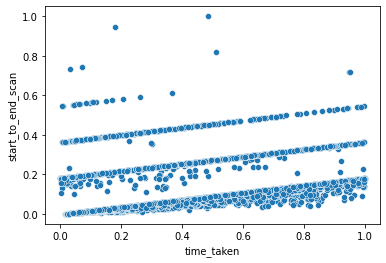

In [1432]:
sns.scatterplot(x = df_start_end_mm["time_taken"] , y = df_start_end_mm["start_to_end_scan"])
plt.show()

In [1433]:
df_start_end_mm.mean()

time_taken           0.279840
start_to_end_scan    0.064308
dtype: float64

In [1434]:
df_start_end_mm.min()

time_taken           0.0
start_to_end_scan    0.0
dtype: float64

In [1435]:
df_start_end_mm.max()

time_taken           1.0
start_to_end_scan    1.0
dtype: float64

In [1436]:
df_start_end_mm.std()

time_taken           0.243261
start_to_end_scan    0.083588
dtype: float64

# ***Actual_Time and Segment_Actual_Time***

In [1437]:
df_actual_time_mm = MinMaxScaler().fit_transform(df_actual_time)
type(df_actual_time_mm)

numpy.ndarray

In [1438]:
df_actual_time_mm = pd.DataFrame(df_actual_time_mm , columns = ["actual_time" , "segment_actual_time"])

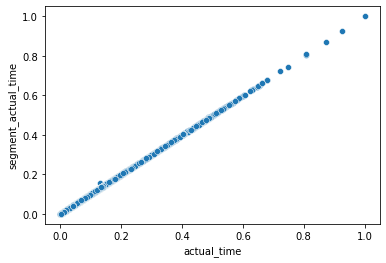

In [1439]:
sns.scatterplot(x = df_actual_time_mm["actual_time"] , y = df_actual_time_mm["segment_actual_time"])
plt.show()

In [1440]:
df_actual_time_mm.mean()

actual_time            0.055516
segment_actual_time    0.055306
dtype: float64

In [1441]:
df_actual_time_mm.min()

actual_time            0.0
segment_actual_time    0.0
dtype: float64

In [1442]:
df_actual_time_mm.max()

actual_time            1.0
segment_actual_time    1.0
dtype: float64

In [1443]:
df_actual_time_mm.std()

actual_time            0.089757
segment_actual_time    0.089434
dtype: float64

# ***OSRM_Time and Segment_OSRM_Time***

In [1444]:
df_osrm_time_mm = MinMaxScaler().fit_transform(df_osrm_time)
type(df_osrm_time_mm)

numpy.ndarray

In [1445]:
df_osrm_time_mm = pd.DataFrame(df_osrm_time_mm , columns = ["osrm_time" , "segment_osrm_time"])

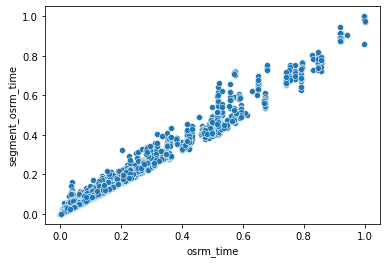

In [1446]:
sns.scatterplot(x = df_osrm_time_mm["osrm_time"] , y = df_osrm_time_mm["segment_osrm_time"])
plt.show()

In [1447]:
df_osrm_time_mm.mean()

osrm_time            0.076501
segment_osrm_time    0.068222
dtype: float64

In [1448]:
df_osrm_time_mm.min()

osrm_time            0.0
segment_osrm_time    0.0
dtype: float64

In [1449]:
df_osrm_time_mm.max()

osrm_time            1.0
segment_osrm_time    1.0
dtype: float64

In [1450]:
df_osrm_time_mm.std()

osrm_time            0.133988
segment_osrm_time    0.123018
dtype: float64

# ***OSRM_Distance and Segment_OSRM_Distance***

In [1451]:
df_osrm_distance_mm = MinMaxScaler().fit_transform(df_osrm_distance)
type(df_osrm_distance_mm)

numpy.ndarray

In [1452]:
df_osrm_distance_mm = pd.DataFrame(df_osrm_distance_mm , columns = ["osrm_distance" , "segment_osrm_distance"])

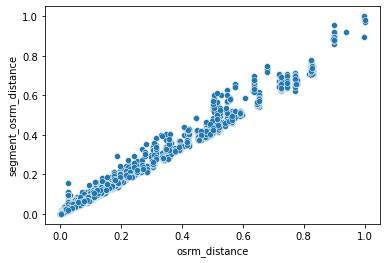

In [1453]:
sns.scatterplot(x = df_osrm_distance_mm["osrm_distance"] , y = df_osrm_distance_mm["segment_osrm_distance"])
plt.show()

In [1454]:
df_osrm_distance_mm.mean()

osrm_distance            0.068815
segment_osrm_distance    0.060785
dtype: float64

In [1455]:
df_osrm_distance_mm.min()

osrm_distance            0.0
segment_osrm_distance    0.0
dtype: float64

In [1456]:
df_osrm_distance_mm.max()

osrm_distance            1.0
segment_osrm_distance    1.0
dtype: float64

In [1457]:
df_osrm_distance_mm.std()

osrm_distance            0.130895
segment_osrm_distance    0.118606
dtype: float64

# ***Actual_Time and OSRM_Time***

In [1458]:
df_actual_osrm_time_mm = MinMaxScaler().fit_transform(df_actual_osrm_time)
type(df_actual_osrm_time_mm)

numpy.ndarray

In [1459]:
df_actual_osrm_time_mm = pd.DataFrame(df_actual_osrm_time_mm , columns = ["actual_time" , "osrm_time"])

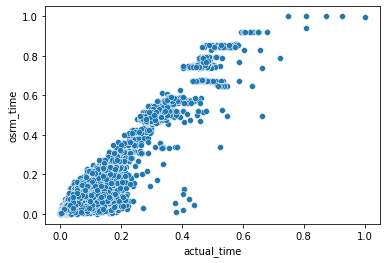

In [1460]:
sns.scatterplot(x = df_actual_osrm_time_mm["actual_time"] , y = df_actual_osrm_time_mm["osrm_time"])
plt.show()

In [1461]:
df_actual_osrm_time_mm.mean()

actual_time    0.055516
osrm_time      0.076501
dtype: float64

In [1462]:
df_actual_osrm_time_mm.min()

actual_time    0.0
osrm_time      0.0
dtype: float64

In [1463]:
df_actual_osrm_time_mm.max()

actual_time    1.0
osrm_time      1.0
dtype: float64

In [1464]:
df_actual_osrm_time_mm.std()

actual_time    0.089757
osrm_time      0.133988
dtype: float64

# **Insights**

1. The two fields i.e. Source_name and Destination_name have missing values percentage is approximately 0.20% each.

2. The entire numerical data columns are heavily right skewed because there are many outliers.

3. As per the value_counts, the count of FTL(Full Truck Load) shipments is high and preferred mode of transport when compared to the Carting transportation type before merging the rows and it is approximately 2 times of Carting.

4. After merging the rows the count of Carting is approximately 2 times of FTL(Full Truck Load) and it is preferred mode of transportation.

5. So after the entire merging of columns based on their Trip_uuid, Source ID and Destination ID the final dataset that has been created with multiple induced features and distict rows.The Final dataset has: 14787 rows and 18 columns.

6. There is a high negative correlation between almost all the other features &
trip_creation_month.

7. When compared the difference between the two columns start_scan_to_end_scan & Timediff_start_end,can see that both the curves are overlapping which means they are fairly same.

8. As per the visual analysis done, agg_actual_time seems greater than agg_osrm_time and which is intutive as well.

9. When compared the aggregation between two columns Aggregate OSRM time &
Aggregate Segment OSRM Time,seems there is a overlap between both the variables which suggests segment distances & agg distances are almost same.

10. From the graph, seems like almost all the features are heavy positively correlated with each other & which is intutive as well.



# **Insights** Hypothesis Testing

1. When Hypothesis test is conducted for mean difference of **Actual_time aggregated value and OSRM time aggregated value**. As p-value < .05 ,so We have enough evidence to reject the null hypothesis and there is difference between the mean for **Actual_time aggregated value and OSRM time aggregated value**. Hence Null hypothesis has been rejected.

2. When Hypothesis test is conducted for **Actual time aggregated value and Segment Actual time aggregated value**. As p-value > .05, so We fail so reject the null hypothesis and there is no mean difference between **Actual time aggregated value and Segment Actual time aggregated value**. Hence we fail to reject Null Hypothesis

3. When Hypothesis test is conducted for mean difference of **OSRM Distance aggregated value and Segment OSRM Distance aggregated value **. As p < .05, so We have enough evidence to reject the null hypothesis and there is difference between the mean for  **OSRM Distance aggregated value and Segment OSRM Distance aggregated value **. Hence Null hypothesis has been rejected.

4.  When Hypothesis test is conducted for mean difference of **OSRM time aggregated value and Segment OSRM time aggregated value**. As p < .05, so We have enough evidence to reject the null hypothesis and there is difference between the mean for  **OSRM time aggregated value and Segment OSRM time aggregated value**. Hence Null hypothesis has been rejected.


5.  When Hypothesis test is conducted for **start_scan_to_end_scan** & **time_taken**. As p value > .05, so We fail so reject the null hypothesis and there is no mean difference between **start_scan_to_end_scan** & **time_taken**. Hence we fail to reject Null Hypothesis.

# **Recommendations**

1. Instead of depending only on FTL and Carting. We can also implement on air consignment network such as drones, aeroplane, which focuses on deliver of cargo to prime business users not only with in country but can be sent overseas too.

2. Delivery of consignment/package in most reliable transit period i.e. in shortest period possible for customer satisfaction.

3. Carting route consists of 40% of the total orders. More ways to promote Carting route handling system can be implemented for shorter distances to increase this percentage.

4. Improvements in logistics, shorter delivery schedules, inventory levels to reduce the overall maintainence cost. 

5. Time taken can be reduced by some time if proper logistics method apply.

